# Logistic Regression Practice

![wine image from http://canadianclubofrome.blogspot.com/2017/02/ccr-wine-tasting-wines-from-le-marche.html](images/wine.jpg)

Data Source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

This wine data was gathered in 2009 from red and white variants of the Portuguese "Vinho Verde" wine.

In [1]:
# The most basic of imports
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/winequality-red-withtarget.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
target                  1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## Business Understanding

We have a binary `target` column - each row is `1` if the wine is of great quality, and `0` if the wine is of normal/below average quality. "Great quality" is defined as having a 7+ wine quality score in the original data, from a column that has been removed in this csv.

So: what kind of problem is this?

- classification


Let's define a plausible business problem that this data could solve:

- pricing
- buying for a restaurant/supplier/self
- relationship between great quality and factors of wine

endusers:

- people buying the wine
- people making the wine

True business problem:

- create a model that can, if given data from wine producers about the composition of the wine, predict whether the wine will be of great (above average) quality so that restaurant owners can buy the best quality wine

context:
- false negative in this context: predicts that an actually good quality wine is bad
    - outcome: buy less wine - miss out on some good quality wines
- false positive in this context: predicts that an actually bad quality wine is good
    - outcome: buy bad wine

Related: which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models? 

- Accuracy
- **Precision**
- Recall
- F1-Score


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Data Exploration and Cleaning

What steps do we want to perform to explore our data, and do we need to do any cleaning of this data to avoid problems down the line?

- scale data
- correlation - check for multicollinearity
- check the balance of our target


In [7]:
df['target'].value_counts()

0    1382
1     217
Name: target, dtype: int64

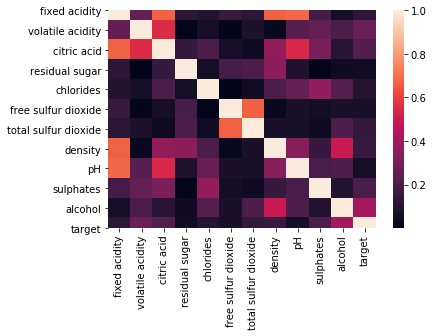

In [9]:
sns.heatmap(df.corr().abs())

In [14]:
df.corr().abs() > .75

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,True,False,False,False,False,False
density,False,False,False,False,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


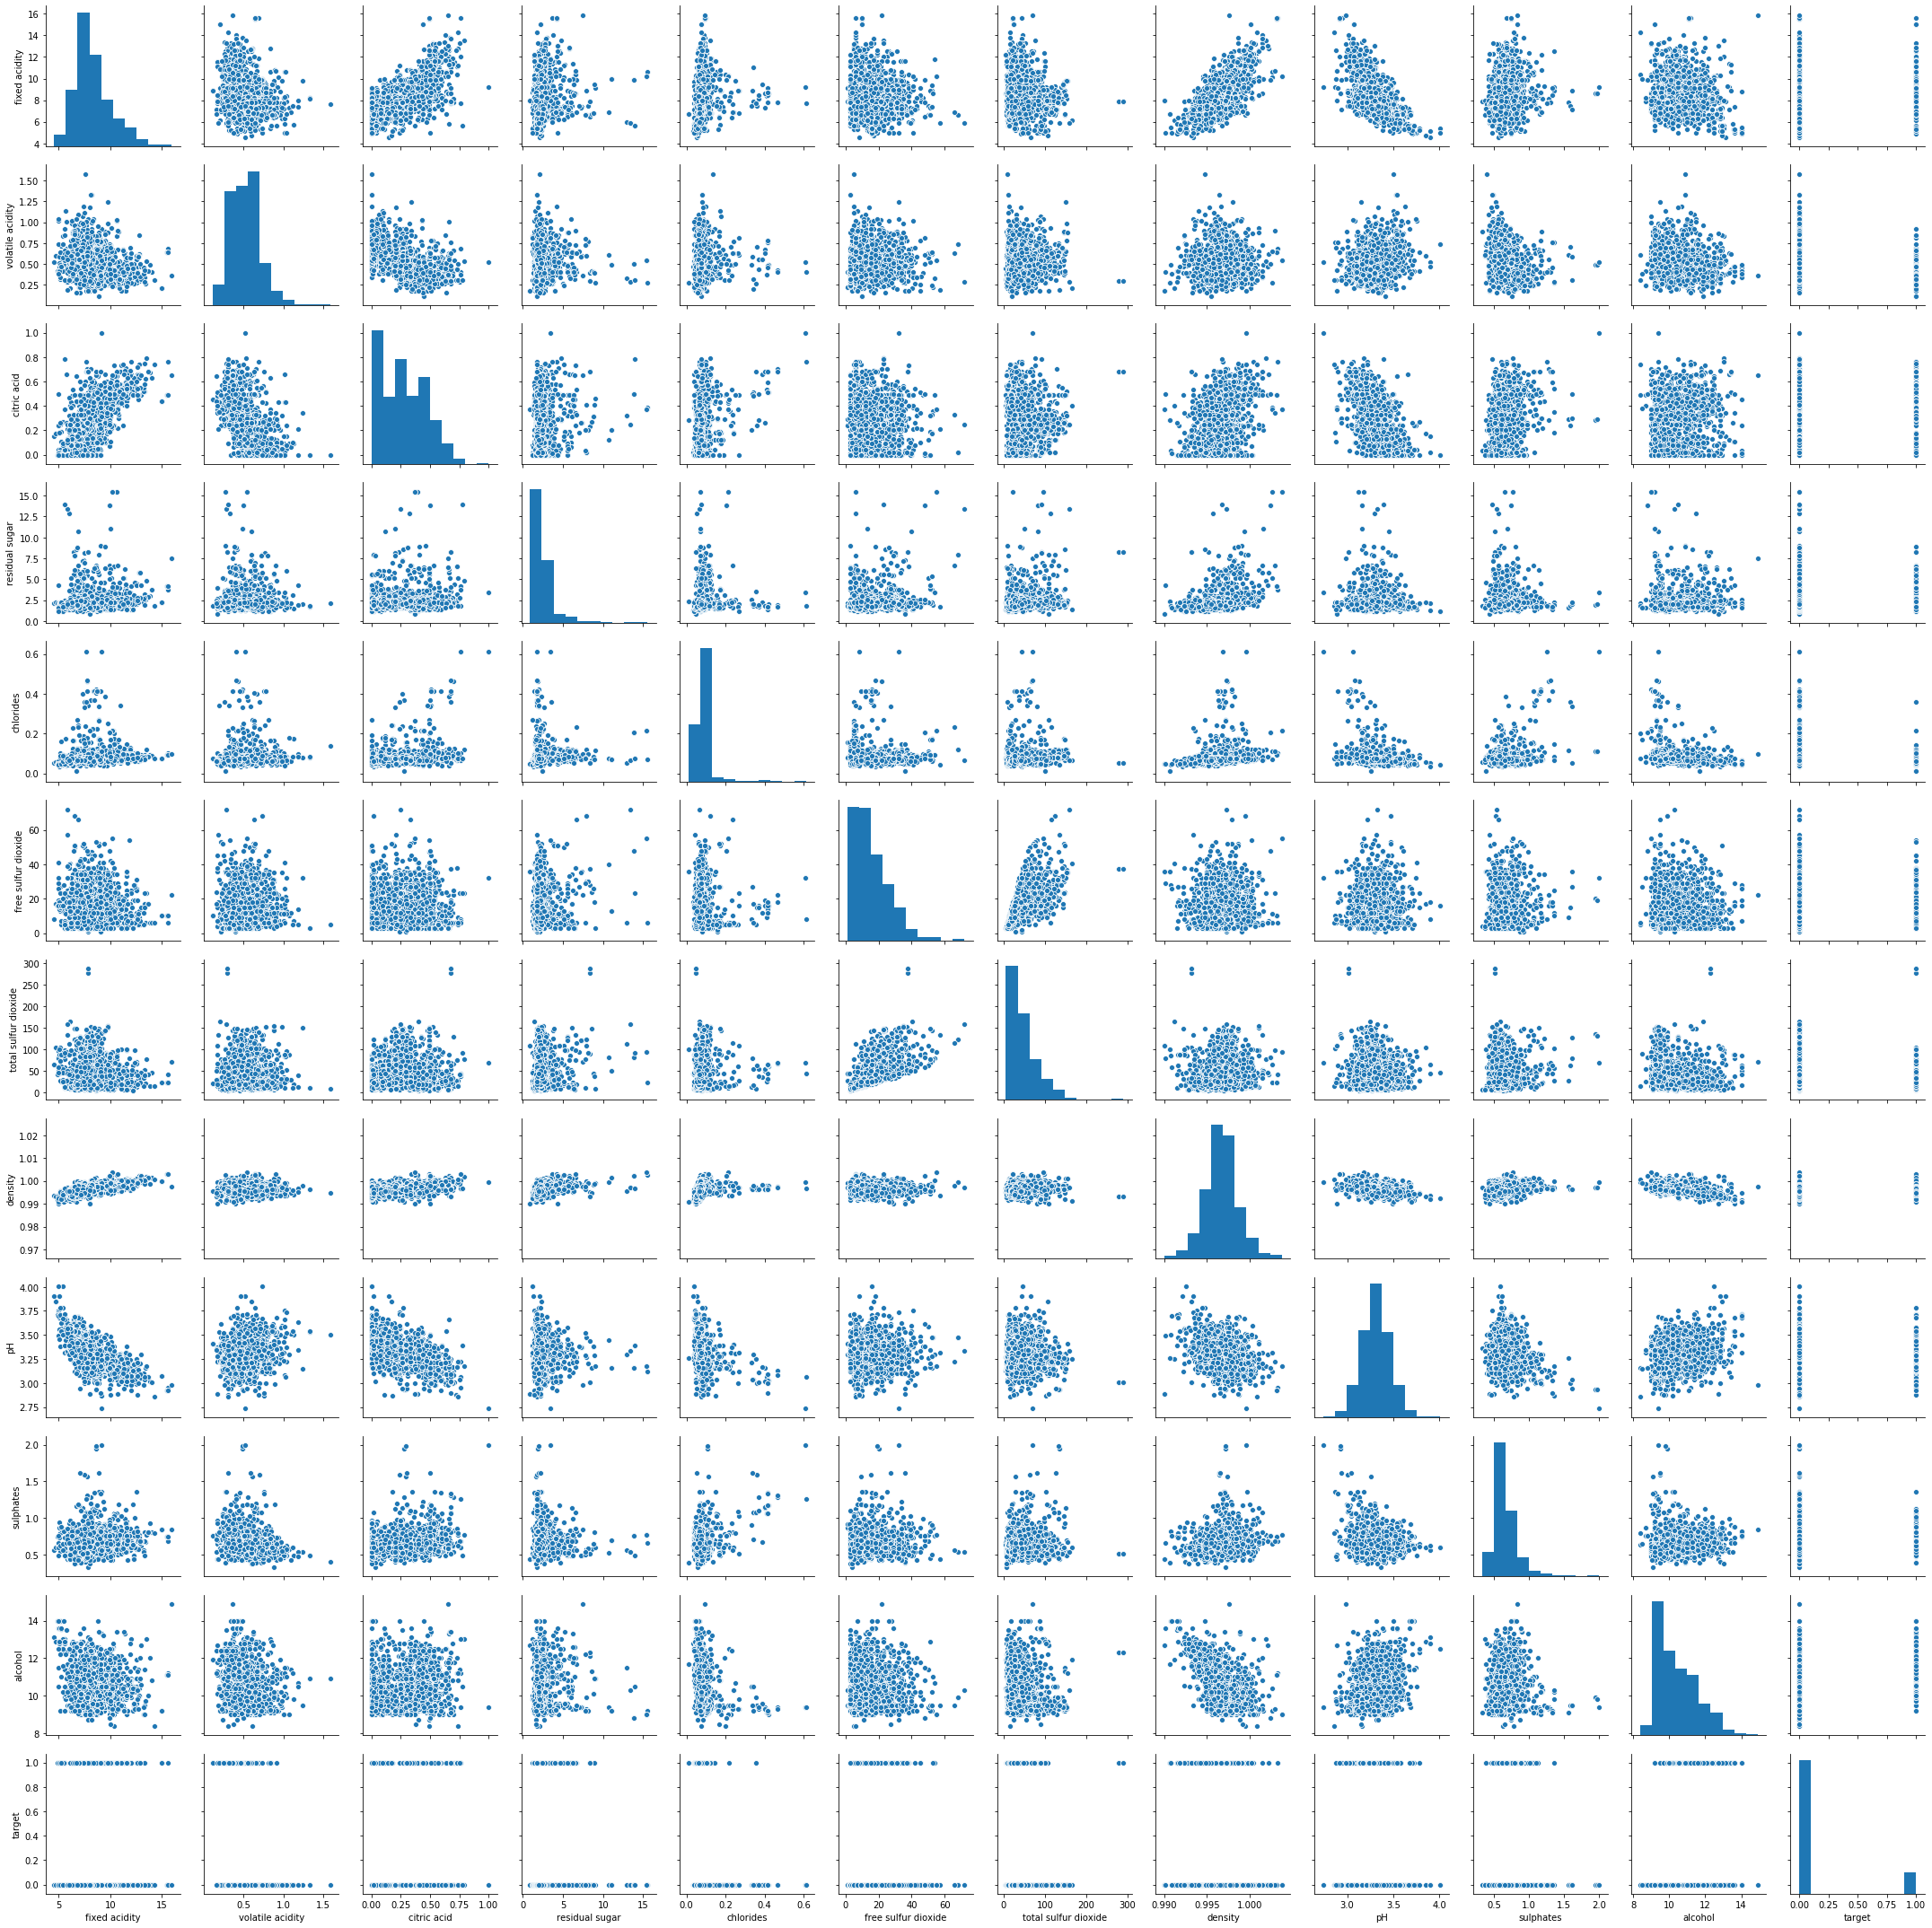

In [15]:
sns.pairplot(df)

## Modeling and Evaluation

Where do we want to start with modeling? What potential steps do we want to try to iterate through and potentially improve our model?

- define X and y and perform a train-test split
- scale - pre-processing before modeling
    - Standard vs MinMax vs Robust
- model
    - model-less baseline, LogReg
- balance our target
    - set `class_weight='balanced'` - also over-sample our minority class, under-sample our majority class, or synthesize more minority data with 'SMOTE'


In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
X = df.drop(columns='target')
y = df['target']

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model-Less Baseline

In [28]:
len(df.loc[df['target'] == 0]) / len(df)

0.8642901813633521

Accuracy : TP + TN / TP + TN + FP + FN

0 + 1382 / 0 + 1382 + 0 + 217

In [39]:
(0 + 1382) / (0 + 1382 + 0 + 217)

0.8642901813633521

### Vanilla Logistic Regression

In [29]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

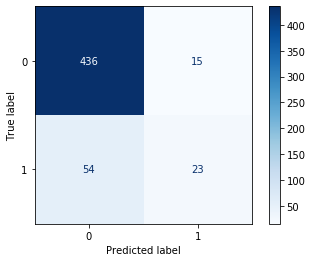

In [34]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.show()

In [46]:
23 / (23 + 15)

0.6052631578947368

In [32]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [35]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8880
TEST: 0.8693
***************
Recall:
TRAIN: 0.3071
TEST: 0.2987
***************
Precision:
TRAIN: 0.6515
TEST: 0.6053
***************
F1-Score:
TRAIN: 0.4175
TEST: 0.4000
***************


### Logistic Regression: Class_weight = 'balanced'

In [41]:
logreg_b = LogisticRegression(class_weight='balanced')

In [42]:
logreg_b.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

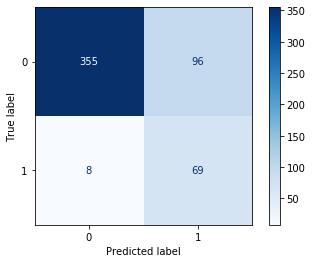

In [43]:
plot_confusion_matrix(logreg_b, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.show()

In [44]:
y_pred_train_b = logreg_b.predict(X_train_scaled)
y_pred_test_b = logreg_b.predict(X_test_scaled)

In [45]:
for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train_b):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test_b):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7824
TEST: 0.8030
***************
Recall:
TRAIN: 0.8071
TEST: 0.8961
***************
Precision:
TRAIN: 0.3542
TEST: 0.4182
***************
F1-Score:
TRAIN: 0.4924
TEST: 0.5702
***************


## Conclusion

How good was our final model? What can we learn from our model? What insights can we glean? 

- 
